# Milestone 1

In [1]:
import pandas as pd

C:\Users\91705\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('reviews.csv')

# Display the first few rows of the dataframe
df.sample(5)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
475215,514347,260302,83093,SusieQusie,5,"Orange, raspberry, cranberry and lime - all my...",2007-11-12T14:54:42Z,2007-11-12T14:54:42Z
1210478,1390743,449901,107135,Dienia B.,5,this was a very nice casserole thank you ...,2013-06-17T22:36:01Z,2013-06-17T22:36:01Z
708184,779962,20090,19185,ccferne,4,Almost exactly like another recipe I've used (...,2009-01-03T23:25:51Z,2009-01-03T23:25:51Z
857252,967042,341050,308666,lclausen,5,I have put bacon on my turkey's for years (can...,2009-10-11T20:25:54Z,2009-10-11T20:25:54Z
192690,206580,118492,93911,SashasMommy,4,These were pretty good... I used garlic salt i...,2005-09-25T15:24:36Z,2005-09-25T15:24:36Z


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


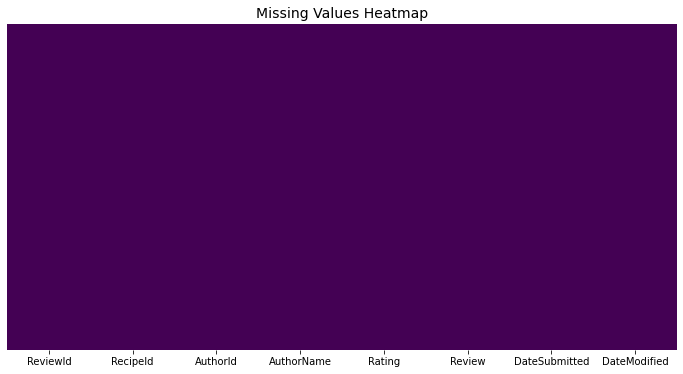

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual dataset file)
df = pd.read_csv('reviews.csv')  

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# Add title
plt.title("Missing Values Heatmap", fontsize=14)

# Show plot
plt.show()


In [5]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Convert to a DataFrame for better readability
missing_df = pd.DataFrame({"Column": df.columns, "Missing Percentage": missing_percentage})

# Display only columns with missing values
missing_df = missing_df[missing_df["Missing Percentage"] > 0].sort_values(by="Missing Percentage", ascending=False)

# Calculate the overall percentage of missing values
overall_missing_percentage = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Print results
print("Percentage of Missing Values in Each Column:\n")
print(missing_df)
print("\nOverall Percentage of Missing Values in the Dataset: {:.2f}%".format(overall_missing_percentage))

Percentage of Missing Values in Each Column:

        Column  Missing Percentage
Review  Review            0.015264

Overall Percentage of Missing Values in the Dataset: 0.00%


In [6]:
import pandas as pd

df_cleaned = df.dropna(subset=['Review'])

# Display information about the cleaned dataset
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1401768 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401768 non-null  int64 
 1   RecipeId       1401768 non-null  int64 
 2   AuthorId       1401768 non-null  int64 
 3   AuthorName     1401768 non-null  object
 4   Rating         1401768 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401768 non-null  object
 7   DateModified   1401768 non-null  object
dtypes: int64(4), object(4)
memory usage: 96.3+ MB


In [7]:
import pandas as pd

# Convert DateSubmitted to datetime format
df_cleaned['DateSubmitted'] = pd.to_datetime(df_cleaned['DateSubmitted'], errors='coerce')

# Extract the year
df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year

# Check if conversion worked
print(df_cleaned[['DateSubmitted', 'Year']].head())

              DateSubmitted  Year
0 2000-01-25 21:44:00+00:00  2000
1 2001-10-17 16:49:59+00:00  2001
2 2000-02-25 09:00:00+00:00  2000
3 2000-03-13 21:15:00+00:00  2000
4 2000-03-28 12:51:00+00:00  2000


<ipython-input-7-af9ca6365b3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DateSubmitted'] = pd.to_datetime(df_cleaned['DateSubmitted'], errors='coerce')
<ipython-input-7-af9ca6365b3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year


## Analysis of Cleaned Data

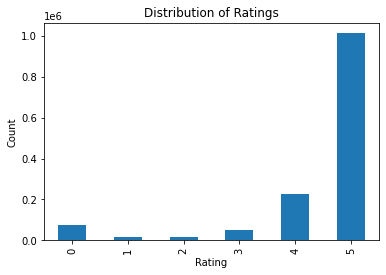

In [8]:
import matplotlib.pyplot as plt
df_cleaned['Rating'].value_counts().sort_index().plot(kind='bar', title="Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [9]:
top_reviewers = df_cleaned['AuthorName'].value_counts().head(10)
top_recipes = df_cleaned['RecipeId'].value_counts().head(10)

In [10]:
top_reviewers

AuthorName
Sydney Mike            8842
Sharon123              6605
Boomette               5438
Baby Kato              4693
Annacia                4586
Kittencalrecipezazz    3963
Rita1652               3743
Parsley                3688
PaulaG                 3590
lazyme                 3543
Name: count, dtype: int64

In [11]:
top_recipes

RecipeId
45809    2892
2886     2177
27208    1614
89204    1584
39087    1491
67256    1359
35813    1352
54257    1325
22782    1273
32204    1228
Name: count, dtype: int64

<ipython-input-12-76b766954b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year


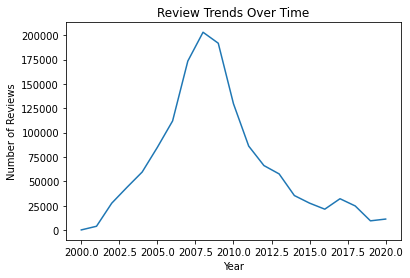

In [12]:
df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year
df_cleaned.groupby('Year').size().plot(kind='line', title="Review Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


<Axes: title={'center': 'Average Rating Over Time'}, xlabel='Year'>

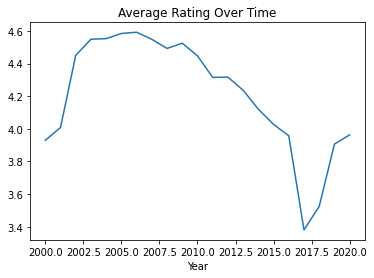

In [13]:
df_cleaned.groupby('Year')['Rating'].mean().plot(kind='line', title="Average Rating Over Time")


In [14]:
# Save the cleaned dataset as a CSV file in the current directory
df_cleaned.to_csv("cleaned_reviews_dataset_2.csv", index=False)

# Milestone 2

In [18]:
import pandas as pd
import numpy as np
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Start timer
start_time = time.time()

# Filter and prepare the data
df_reviews = df_cleaned[['Rating', 'Review']].dropna(subset=['Rating', 'Review']).copy()
df_reviews['HighRating'] = (df_reviews['Rating'] == 5).astype(int)
df_reviews['Cleaned_Review'] = df_reviews['Review'].apply(lambda x: ' '.join(re.findall(r'\w+', str(x).lower())))

# Reduce dataset size for faster processing (optional optimization)
df_reviews_sample = df_reviews.sample(n=10000, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_reviews_sample['Cleaned_Review'])
y = df_reviews_sample['HighRating']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
}

results = {}


In [19]:

# Train and evaluate with progress messages
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    report = classification_report(y_val, y_pred, output_dict=True)
    auc = roc_auc_score(y_val, y_proba)
    fpr, tpr, _ = roc_curve(y_val, y_proba)

    results[name] = {
        "model": model,
        "report": report,
        "auc": auc,
        "fpr": fpr,
        "tpr": tpr
    }
    print(f"{name} completed.")


Training Logistic Regression...
Logistic Regression completed.
Training Decision Tree...
Decision Tree completed.
Training Random Forest...
Random Forest completed.


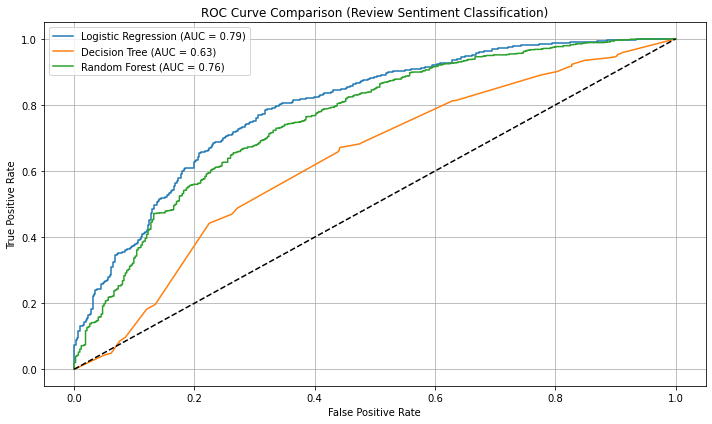

In [20]:

# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.plot(res["fpr"], res["tpr"], label=f"{name} (AUC = {res['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison (Review Sentiment Classification)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Prepare summary DataFrame
summary = {
    model: {
        "Accuracy": res["report"]["accuracy"],
        "Precision": res["report"]["1"]["precision"],
        "Recall": res["report"]["1"]["recall"],
        "F1-Score": res["report"]["1"]["f1-score"],
        "AUC": res["auc"]
    }
    for model, res in results.items()
}



In [21]:
from IPython.display import display
display(summary_df)


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.776000,0.789679,0.937790,0.857385,0.793591
1,Decision Tree,0.708000,0.737900,0.920149,0.819008,0.628243
2,Random Forest,0.724667,0.722819,1.000000,0.839112,0.758925
